Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Привет! Буду свои комментарии оставлять вот в таких ячейках</font>
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

## Проект спринт 11
**Название проекта**:  
ГлавРосГосНефть   
_____
**Описание исследования**:  
Имеются пробы нефти в трёх регионах. Необходимо построить модель для прогноза возможной прибыли и рисков  
_____
**Цель исследования**:  
Определение региона, где добыча принесёт наибольшую прибыль.
_____
**План исследования.**  
[Шаг 1. Загрузка и подготовка данных](#step1)  
[Шаг 2. Обучение и проверка модели для каждого региона](#step2)  
[Шаг 3. Расчет безубыточности](#step3)  
[Шаг 4. Расчёт прибыли по выбранным скважинам и предсказаниям модели](#step4)  
[Шаг 5. Расчет рисков и прибыли для каждого региона](#step5)  
[Шаг 6. Результаты и выводы](#step6)  
_____
**Исходные данные.**
Исходные файлы, содержащие данные геологоразведки трёх регионов:  
- <a HREF='geo_data_0.csv'>geo_data_0.csv</a>  
- <a HREF='geo_data_1.csv'>geo_data_1.csv</a>  
- <a HREF='geo_data_2.csv'>geo_data_2.csv</a>  
Поля файлов:
- id — уникальный идентификатор скважины
- f0, f1, f2 — три неизвестных, но значимых признака точек
- product — объём запасов в скважине (тыс. баррелей)

<a id='step1'></a>
## Шаг 1. Загрузка и подготовка данных

In [49]:
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from numpy.random import RandomState
RANDOM_STATE = 54321
pd.options.mode.chained_assignment = None


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы все импорты были собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправлено, импорт `RandomState` перенесен в эту ячейку</font>
</div>

In [61]:
try:
    df = pd.read_csv('geo_data_0.csv')
    print('Загрузили файл локально')
except:
    print('локально не удалось, загружаем из интернета')
    df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

локально не удалось, загружаем из интернета


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [63]:
df.sample(10)

,id,f0,f1,f2,product
31103,vS9TQ,1.624159,-0.332836,7.465166,155.729090
60861,kkkXw,1.122758,-0.033329,4.763660,96.466245
15209,LTq32,0.526715,-0.329397,4.032937,115.713082
25906,VbzxP,0.712107,-0.385599,-1.117624,74.078953
12197,MnTQq,-0.133723,0.001374,8.259782,109.237340
86874,Ej4Mc,0.122468,0.270921,8.590223,83.193995
66415,Ah1hN,1.029827,-0.057084,0.786546,59.944496
8341,oJUSw,1.980738,0.349506,5.691578,119.347103
42792,Q0KKD,1.017314,0.177785,4.316699,16.918545
26730,8iy9v,-0.970973,0.284922,5.067096,33.177523


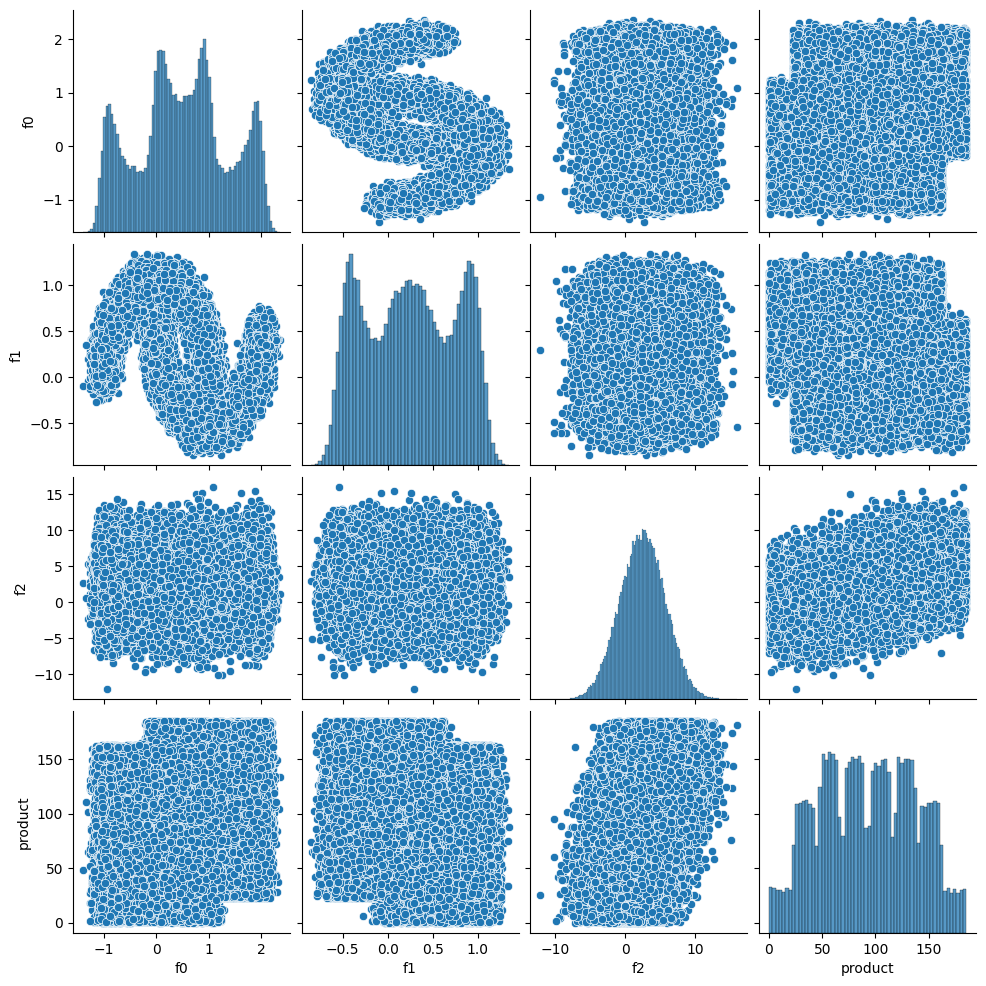

In [64]:
sns.pairplot(df)

локально не удалось, загружаем из интернета


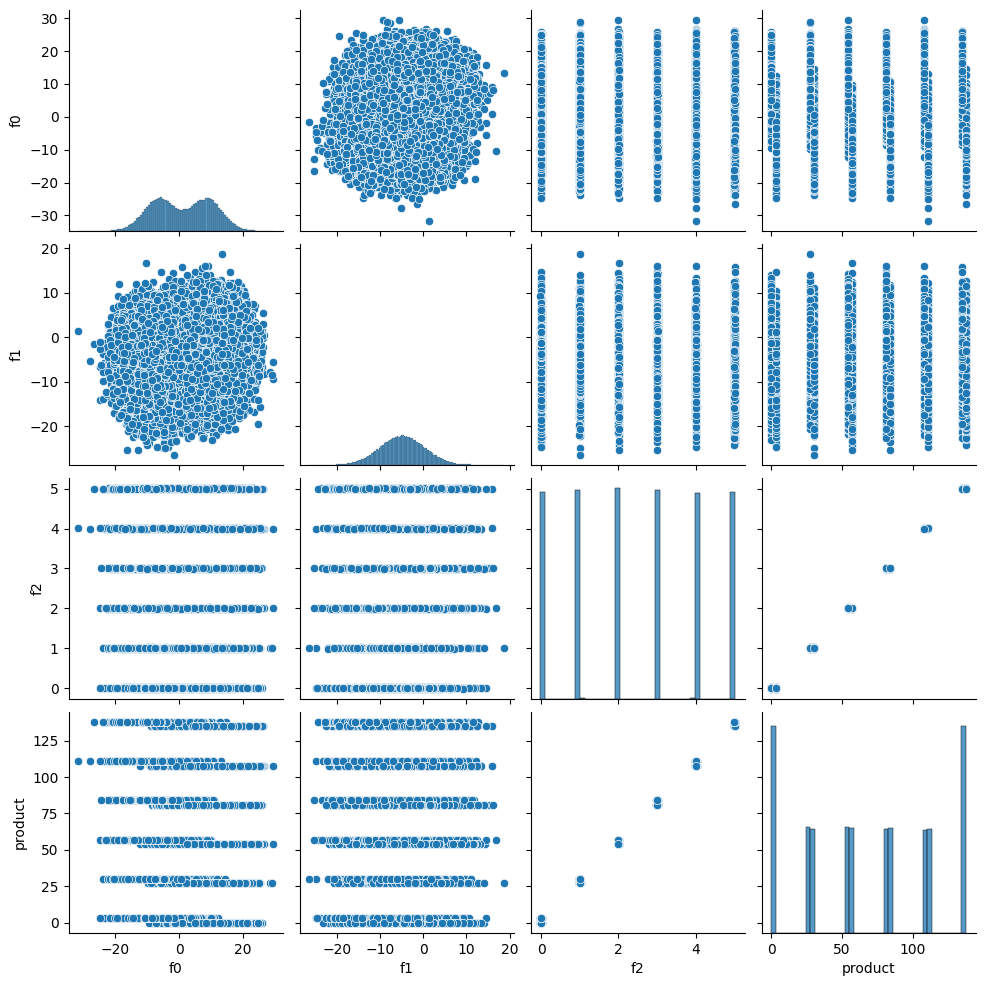

In [65]:
try:
    df = pd.read_csv('geo_data_1.csv')
    print('Загрузили файл локально')
except:
    print('локально не удалось, загружаем из интернета')
    df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
_ = sns.pairplot(df)

локально не удалось, загружаем из интернета


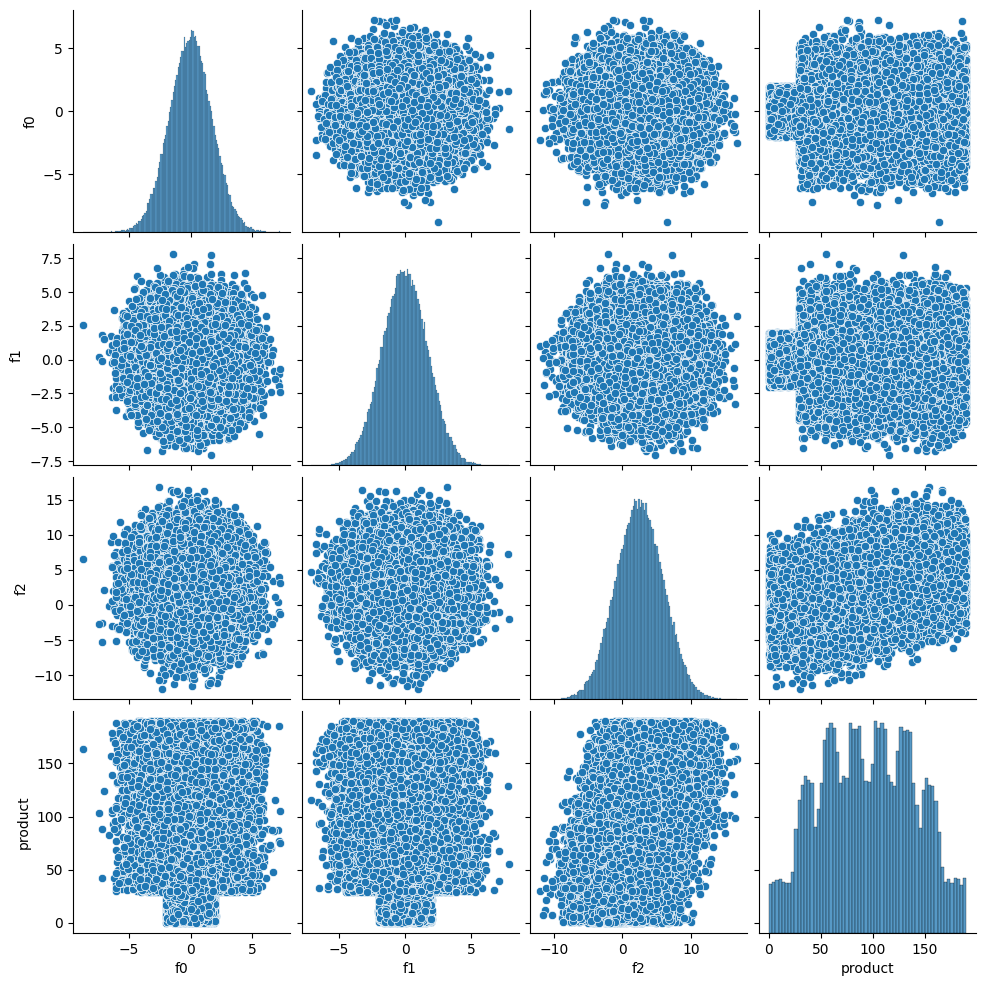

In [55]:
try:
    df = pd.read_csv('geo_data_2.csv')
    print('Загрузили файл локально')
except:
    print('локально не удалось, загружаем из интернета')
    df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
_ = sns.pairplot(df)

<div class="alert alert-block alert-info">
<b>Совет: </b> Такую же визуализация желательно было сделать для каждого региона.
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>исправлено: графики сделаны для всех трех файлов, также добавлен комментарий ниже</font>
</div>

Фичи распределены не нормально

<a id='step2'></a>
## Шаг 2. Обучение и проверка модели для каждого региона

In [66]:
def process_file(file_name):
    try:
        df = pd.read_csv(file_name)
        print('Загрузили файл локально')
    except:
        file_path = 'https://code.s3.yandex.net/datasets/' + file_name
        print('локально не удалось, загружаем из интернета')
        df = pd.read_csv(file_path)
    df.drop('id', axis='columns', inplace=True)
    features = df.drop('product', axis='columns')
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=RANDOM_STATE)
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train.loc[:,numeric] = scaler.transform(features_train.loc[:,numeric])
    features_valid.loc[:,numeric] = scaler.transform(features_valid.loc[:,numeric])
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    print(f'регион: {file_name}\tсредний запас (факт): {target_valid.mean()}\tсредний запас (предсказания): {predict_valid.mean()}\tRMSE: {mean_squared_error(target_valid, predict_valid, squared=False)}')
    predict_all = model.predict(features)
    df['product_predict'] = predict_all
    return df.iloc[features_valid.index,:]

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на треине!
</div>

In [67]:
df = []
df.append(process_file('geo_data_0.csv'))
df.append(process_file('geo_data_1.csv'))
df.append(process_file('geo_data_2.csv'))

локально не удалось, загружаем из интернета
регион: geo_data_0.csv	средний запас (факт): 92.58379661728391	средний запас (предсказания): 92.15921155743655	RMSE: 37.68341093860808
локально не удалось, загружаем из интернета
регион: geo_data_1.csv	средний запас (факт): 68.44435360774597	средний запас (предсказания): 68.44594093153303	RMSE: 0.892281970848146
локально не удалось, загружаем из интернета
регион: geo_data_2.csv	средний запас (факт): 95.07834473652275	средний запас (предсказания): 94.92229500787452	RMSE: 40.15250541784855


<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Я перезапустил код в практикуме и все сломалось, почини, пожалуйста, пути.
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправлено.</font>
</div>

Загрузили все 3 файла и построили модели для каждого региона  
результаты обучения моделей:  
|регион|средний запас (факт)|средний запас (предсказания)|RMSE|
|-|-|-|-|
|0|92.5|92.1|37.6|
|1|68.4|68.4|0.8|
|2|95.0|94.9|40.1|  

В 0 и 2 регионе модели показывают достаточно большой RMSE, требуется дополнительный анализ

<a id='step3'></a>
## Шаг 3. Расчет безубыточности  
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  
Бюджет на разработку скважин в регионе — 10 млрд рублей.  
При нынешних ценах один баррель сырья приносит 450 рублей дохода.  
Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
Доход от выбранных 200 точек равен:  
- 200 точек
- умножить на средний запас нефти в этих 200 точках в баррелях
- умножить на 450.000 рублей за баррель
чтобы рассчитать точку безубыточности, нужно приравнять этот доход расходам на разработку скважин  
200 * ср.запас в выбранных точках * 450.000 - 10.000.000.000 = 0  
ср.запас = 1000 / 9 = 111.11  
Итого: чтобы разработка в регионе была безубыточна, нужно чтобы средний запас в 200 выбранных точках составлял не менее 111.11 тыс. баррелей, или, что то же самое, чтобы суммарный запас в 200 выбранных точках составлял не менее 22.222 тыс. баррелей

Во всех трех регионах средний запас в скважине ниже, чем требуется для безубыточности, т.е. случайным образом выбирать скважины нельзя.

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

<a id='step4'></a>
## Шаг 4. Расчёт прибыли по выбранным скважинам и предсказаниям модели

In [68]:
# функция расчета прибыли от 200 скважин, выбранных по максимальным предсказаниям модели

def profit(points):
    p = points.sort_values(by='product_predict', ascending=False)
    #print(p.head(10))
    p = p.iloc[:200,:]
    s = p['product'].sum()
    return s * 450_000 - 10_000_000_000

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> `.loc` возвращает элементы с индексами до 500. Если вместо этого использовать `.iloc`, то будут возврашены топ-200 элементов по порядку.
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>исправлено</font>
</div>

<a id='step5'></a>
## Шаг 5. Расчет рисков и прибыли для каждого региона

In [69]:
ALPHA = 0.05
N = 500
SAMPLES = 1000
BS_RANDOM_STATE = RandomState(RANDOM_STATE)
for region in range(len(df)):
    profits_bs = []
    for i in range(SAMPLES):
        bootstrap = df[region].sample(n=N, random_state=BS_RANDOM_STATE, replace=True).reset_index(drop=True)
        profits_bs.append(profit(bootstrap))
    profits_bs = pd.Series(profits_bs)
    # conf_int = t.interval(1-ALPHA, df=N-1, loc=profits_bs.mean(), scale=profits_bs.sem())
    lower = profits_bs.quantile(ALPHA / 2.0)
    upper = profits_bs.quantile(1.0 - ALPHA / 2.0)
    # losses = profits_bs[profits_bs<0].count()
    # plus = profits_bs[profits_bs>0].count()
    print(f'''
    регион: {region}
    средняя прибыль: {profits_bs.mean():>12,.0f}
    95% доверительный интервал: [{lower:>12,.0f} {upper:>12,.0f}]
    риск убытков: {(profits_bs<0).mean():.1%}''')


    регион: 0
    средняя прибыль:  278,071,212
    95% доверительный интервал: [-227,389,217  791,900,372]
    риск убытков: 14.2%

    регион: 1
    средняя прибыль:  416,094,091
    95% доверительный интервал: [  38,625,447  820,932,963]
    риск убытков: 1.8%

    регион: 2
    средняя прибыль:  402,095,538
    95% доверительный интервал: [-116,975,855  966,092,915]
    риск убытков: 7.2%


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> На каждой итерации нужно семплить только из валидационной части.
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>исправлено: функция `process_file` сейчас возвращает сразу валидационную выборку</font>
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>поправлено, включая alpha -> ALPHA</font>
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап.
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправлено. Все числа изменились, также соответственно исправлен вывод</font>
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>учтено-поправлено</font>
</div>

с помощью 1000 случайных выборок по 500 скважин для анализа и выбора из них 200 наиболее крупных по запасам по модельным расчетам, были получены следующие оценки регионов:  
|регион|средняя прибыль|95% доверительный интервал|риск убытков|
|-|-|-|-|
|0|278,071,212|[-227,389,217 - 791,900,372]|14.2%|
|1|416,094,091|[38,625,447 - 820,932,963]|1.8%|
|2|402,095,538|[-116,975,855 - 966,092,915]|7.2%|


<a id='step6'></a>
## Шаг 6. Результаты и выводы

Выбираем для разработки регион 1 по следующим причинам:  
- самое высокое среднее значение прибыли
- самое низкое значения риска убытков  
- в 95% доверительном интервале положительная прибыль